## ECE 232E Project 3

In [248]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from matplotlib.colors import ListedColormap


### Problem 1:

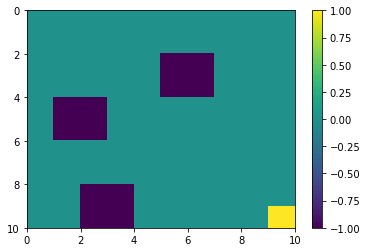

In [249]:
# reward function 1
matrix = np.zeros((10,10))
matrix[2][5] = -1.0
matrix[2][6] = -1.0
matrix[3][5] = -1.0
matrix[3][6] = -1.0
matrix[4][1] = -1.0
matrix[4][2] = -1.0
matrix[5][1] = -1.0
matrix[5][2] = -1.0
matrix[8][2] = -1.0
matrix[8][3] = -1.0
matrix[9][2] = -1.0
matrix[9][3] = -1.0
matrix[9][9] = 1.0
# plot the heat map
plt.pcolor(matrix, vmin=np.min(matrix), vmax=np.max(matrix))
plt.ylim(top=0, bottom=10)
plt.xlim(left=0, right=10)
plt.colorbar()

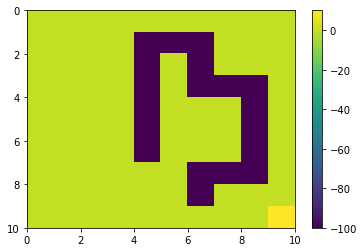

In [250]:
# reward function 2
matrix2 = np.zeros((10,10))
matrix2[1][4] = -100.0
matrix2[1][5] = -100.0
matrix2[1][6] = -100.0
matrix2[2][4] = -100.0
matrix2[2][6] = -100.0
matrix2[3][4] = -100.0
matrix2[3][6] = -100.0
matrix2[3][7] = -100.0
matrix2[3][8] = -100.0
matrix2[4][4] = -100.0
matrix2[4][8] = -100.0
matrix2[5][4] = -100.0
matrix2[5][8] = -100.0
matrix2[6][4] = -100.0
matrix2[6][8] = -100.0
matrix2[7][6] = -100.0
matrix2[7][7] = -100.0
matrix2[7][8] = -100.0
matrix2[8][6] = -100.0
matrix2[9][9] = 10.0
# plot the heat map
plt.pcolor(matrix2, vmin=np.min(matrix2), vmax=np.max(matrix2))
plt.ylim(top=0, bottom=10)
plt.xlim(left=0, right=10)
plt.colorbar()

### Problem 2:

In [251]:
# set up functions
# probability function
def prob(curr_state, next_state, move, proba):
    #check if it's a neighbor
    left = curr_state -10
    up = curr_state-1
    right = curr_state+10
    down = curr_state+1
    # not a neighbor
    if(next_state==left):
        if(move == -10):
            return (1-proba+proba/4)
        else:
            return(proba/4)
    elif(next_state==up):
        if(move == -1):
            return (1-proba+proba/4)
        else:
            return(proba/4)
    elif(next_state==right):
        if(move == 10):
            return (1-proba+proba/4)
        else:
            return(proba/4)
    elif(next_state==down):
        if(move == 1):
            return (1-proba+proba/4)
        else:
            return(proba/4)
    elif(next_state==curr_state):
        record = 0
        if left < 0:
            if move == -10:
                record += (1-proba+proba/4)
            else:
                record = proba/4
        if right > 99:
            if move == 10:
                record += (1-proba+proba/4)
            else:
                record = proba/4
        if up % 10 == 9:
            if move == -1:
                record += (1-proba+proba/4)
            else:
                record += proba/4
        if down % 10 == 0:
            if move == 1:
                record += (1-proba+proba/4)
            else:
                record += proba/4
        return record
    else:
        return 0            
###################################################################
# optimal value function 
def opt_val(probabililty, reward, states, gamma, r):
    # initialization
    for sx in range(10):
        for sy in range(10):
            states[sx, sy]=0
    # extimation
    delta = float('inf')
    while(delta > gamma):
        delta = 0
        store = states[:,:]
        for si in range(100):
            si_ten, si_dig=divmod(si, 10)
            v = states[si_dig, si_ten];
            temp=np.zeros(4);
            actions = [-10, -1, 10, 1]
            for ai in range(4):
                sum = 0;
                near = [si-10, si-1, si+10, si+1, si]
                for sn in near:
                    if(sn<0 or sn>=100 or (si%10==9 and sn%10==0) or (si%10==0 and sn%10==9)):
                        sum=sum
                    else:
                        i_ten, i_dig = divmod(sn, 10)
                        sum +=prob(si, sn, actions[ai], w)*(reward[i_dig, i_ten] + r * store[i_dig, i_ten])
                temp[ai] += sum
            states[si_dig, si_ten]=np.max(temp)
            delta = max(delta, abs(v-states[si_dig, si_ten]))
    return states

#####################################################################
# optimal direction function 
def value_iteration(w, reward, states, gamma, r):
    # initialization
    for sx in range(10):
        for sy in range(10):
            states[sx, sy]=0
    # extimation
    delta = float('inf')
    while(delta > gamma):
        delta = 0
        store = states[:,:]
        direction = np.zeros((10,10))
        act = [0, 1, 2, 3]
        for si in range(100):
            si_ten, si_dig=divmod(si, 10)
            v = states[si_dig, si_ten];
            temp=np.zeros(4);
            actions = [-10, -1, 10, 1]
            for ai in range(4):
                sum = 0;
                near = [si-10, si-1, si+10, si+1, si]
                for sn in near:
                    if(sn<0 or sn>=100 or (si%10==9 and sn%10==0) or (si%10==0 and sn%10==9)):
                        sum=sum
                    else:
                        i_ten, i_dig = divmod(sn, 10)
                        sum +=prob(si, sn, actions[ai], w)*(reward[i_dig, i_ten] + r * store[i_dig, i_ten])
                temp[ai] += sum
            states[si_dig, si_ten]=np.max(temp)
            delta = max(delta, abs(v-states[si_dig, si_ten]))
            # actions
            direction[si_dig, si_ten]=act[np.argmax(temp)]
    return states,direction
###########################################################################
def next_state(curr_dig, curr_ten, a):
    if(a==0):
        next_ten=max(curr_ten-1, 0)
        next_dig=curr_dig
    elif(a==1):
        next_ten=curr_ten
        next_dig=max(curr_dig-1,0)
    elif(a==2):
        next_ten=min(curr_ten+1, 9)
        next_dig=curr_dig
    elif(a==3):
        next_ten=curr_ten
        next_dig=min(curr_dig+1,9)
    next = next_ten*10 + next_dig                
    return next
        
def trans(optt, p):
    pa=np.zeros((100,100))
    for curr in range(100):
        curr_ten, curr_dig=divmod(curr, 10)
        opt_dir = optt[curr_dig, curr_ten]
        for ai in range(4):
                next = next_state(curr_dig, curr_ten, ai)
                prob=p/4
                if(ai==opt_dir):
                    prob+=1-p
                pa[curr][next]=prob
    return pa
    
def D_b(dd1, nr, w):
    # d
    I=np.identity(100)
    # generate transition matrix
    pa1=trans(dd1, w)
    pa2=trans(np.mod(dd1+1,4), w)
    pa3=trans(np.mod(dd1+2,4), w)
    pa4=trans(np.mod(dd1+3,4), w)
    # generate D
    zeroN=np.zeros((100,100))
    row1 = np.concatenate((I, zeroN, np.dot((pa2-pa1), np.linalg.inv(I-nr*pa1))), axis=1)
    row2 = np.concatenate((I, zeroN, np.dot((pa3-pa1), np.linalg.inv(I-nr*pa1))), axis=1)
    row3 = np.concatenate((I, zeroN, np.dot((pa4-pa1), np.linalg.inv(I-nr*pa1))), axis=1)
    row4 = np.concatenate((zeroN, zeroN, np.dot((pa2-pa1), np.linalg.inv(I-nr*pa1))), axis=1)
    row5 = np.concatenate((zeroN, zeroN, np.dot((pa3-pa1), np.linalg.inv(I-nr*pa1))), axis=1)
    row6 = np.concatenate((zeroN, zeroN, np.dot((pa4-pa1), np.linalg.inv(I-nr*pa1))), axis=1)
    row7 = np.concatenate((zeroN, -I, I), axis=1)
    row8 = np.concatenate((zeroN, -I, -I), axis=1)
    row9 = np.concatenate((zeroN, zeroN, I), axis=1)
    row10 = np.concatenate((zeroN, zeroN, -I), axis=1)
    D=np.concatenate((row1, row2, row3, row4, row5, row6, row7, row8, row9, row10), axis=0)
    #G= matrix(D)
    # generate b
    zero1=np.zeros((2*100,1))
    r_max = np.ones((100,1))
    b = np.concatenate((zero1, zero1, zero1, zero1, r_max, r_max),axis=0)
    return D,b
############################################################################
# optimal direction function 
def value_iteration_arrow(w, reward, states, gamma, r):
    # initialization
    for sx in range(10):
        for sy in range(10):
            states[sx, sy]=0
    # extimation
    delta = float('inf')
    while(delta > gamma):
        delta = 0
        store = states[:,:]
        direction = np.chararray((10,10),unicode=True)
        act = ['\u2190', '\u2191', '\u2192', '\u2193']
        for si in range(100):
            si_ten, si_dig=divmod(si, 10)
            v = states[si_dig, si_ten];
            temp=np.zeros(4);
            actions = [-10, -1, 10, 1]
            for ai in range(4):
                sum = 0;
                near = [si-10, si-1, si+10, si+1, si]
                for sn in near:
                    if(sn<0 or sn>=100 or (si%10==9 and sn%10==0) or (si%10==0 and sn%10==9)):
                        sum=sum
                    else:
                        i_ten, i_dig = divmod(sn, 10)
                        sum +=prob(si, sn, actions[ai], w)*(reward[i_dig, i_ten] + r * store[i_dig, i_ten])
                temp[ai] += sum
            states[si_dig, si_ten]=np.max(temp)
            delta = max(delta, abs(v-states[si_dig, si_ten]))
            # actions
            direction[si_dig, si_ten]=act[np.argmax(temp)]
    return states,direction

In [252]:
# creating the environment
states = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        states[i][j] += 10*j + i
        
gamma = 0.01
w = 0.1
nr = 0.8


In [50]:
opt = opt_val(w, matrix, states, gamma, nr)
r_opt = np.round(opt, decimals =3)
print('\n'.join([''.join(['{:9}'.format(item) for item in row]) 
      for row in r_opt]))


     0.04    0.061    0.088    0.122    0.165     0.22     0.29    0.379     0.49     0.61
    0.054    0.079     0.11    0.149    0.179    0.236    0.348    0.488    0.632    0.787
    0.077    0.108    0.149      0.2    0.236    0.146    0.412    0.606    0.816    1.019
    0.072    0.101    0.174    0.265    0.348    0.414    0.562    0.792    1.052    1.315
    0.096    0.034    0.211    0.349    0.489    0.608    0.792    1.053    1.352    1.695
    0.167    0.195    0.303    0.464    0.635    0.819    1.054    1.353    1.733    2.182
    0.257    0.327    0.461    0.634     0.82    1.054    1.353    1.734     2.22    2.807
    0.337    0.442     0.58    0.791    1.053    1.353    1.734     2.22    2.839    3.608
    0.265    0.319    0.407    0.971    1.324    1.733     2.22    2.839    3.629    4.635
    0.208    0.222    0.124    1.197    1.666    2.182    2.807    3.608    4.635    4.702


### Problem 3:

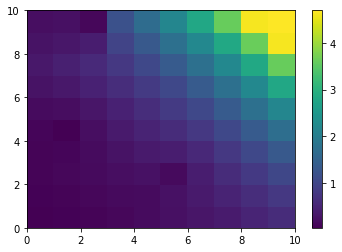

In [64]:
# genetate heat map for previous part
plt.pcolor(r_opt, vmin=np.min(r_opt), vmax=np.max(r_opt))
plt.colorbar()


### Problem 5:

In [142]:
direction1 = np.chararray((10,10), unicode=True)
r = 0.8
w = 0.1
gamma = 0.01


s1, direction1=value_iteration_arrow(w, matrix, states, gamma, r)
    
print(direction1)

[['→' '→' '→' '→' '→' '→' '→' '→' '↓' '↓']
 ['→' '→' '→' '↓' '↓' '→' '→' '→' '↓' '↓']
 ['→' '→' '→' '↓' '↓' '←' '→' '→' '↓' '↓']
 ['→' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '↑' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '↓' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '→' '→' '→' '→' '→' '→' '↓' '↓' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '↓' '↓']
 ['↑' '↑' '↑' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '←' '→' '→' '→' '→' '→' '→' '→']]


### Problem 6:

In [53]:
opt2 = opt_val(w, matrix2, states, gamma, nr)
r_opt2 = np.round(opt, decimals =3)
print('\n'.join([''.join(['{:9}'.format(item) for item in row]) 
      for row in r_opt]))

     0.04    0.061    0.088    0.122    0.165     0.22     0.29    0.379     0.49     0.61
    0.054    0.079     0.11    0.149    0.179    0.236    0.348    0.488    0.632    0.787
    0.077    0.108    0.149      0.2    0.236    0.146    0.412    0.606    0.816    1.019
    0.072    0.101    0.174    0.265    0.348    0.414    0.562    0.792    1.052    1.315
    0.096    0.034    0.211    0.349    0.489    0.608    0.792    1.053    1.352    1.695
    0.167    0.195    0.303    0.464    0.635    0.819    1.054    1.353    1.733    2.182
    0.257    0.327    0.461    0.634     0.82    1.054    1.353    1.734     2.22    2.807
    0.337    0.442     0.58    0.791    1.053    1.353    1.734     2.22    2.839    3.608
    0.265    0.319    0.407    0.971    1.324    1.733     2.22    2.839    3.629    4.635
    0.208    0.222    0.124    1.197    1.666    2.182    2.807    3.608    4.635    4.702


### Problem 7:

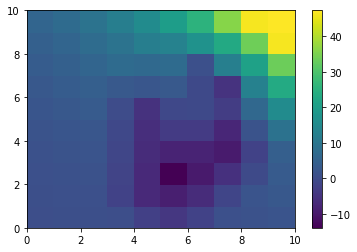

In [63]:
# genetate heat map for previous part
plt.pcolor(r_opt2, vmin=np.min(r_opt2), vmax=np.max(r_opt2))
plt.colorbar()

### Problem 8:

In [58]:
direction2 = np.chararray((10,10), unicode=True)
r = 0.8
w = 0.1

s2, direction2=value_iteration_arrow(w, matrix2, states,gamma, r)
    
print(direction2)

[['↓' '↓' '↓' '←' '←' '→' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↑' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '↑' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '↓' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '←' '→' '↓']
 ['↓' '↓' '↓' '↓' '↓' '↓' '←' '←' '→' '↓']
 ['↓' '↓' '↓' '↓' '↓' '↓' '←' '↓' '↓' '↓']
 ['→' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→']]


### Problem 9:

In [204]:
direction2 = np.chararray((10,10), unicode=True)
r = 0.8
w = 0.6

s2, direction2=value_iteration_arrow(w, matrix2, states,gamma, r)
    
print(direction2)

[['←' '←' '←' '←' '←' '←' '→' '→' '→' '↑']
 ['↑' '←' '←' '←' '←' '↑' '→' '→' '↑' '↑']
 ['↑' '←' '←' '←' '←' '↓' '→' '→' '↑' '↑']
 ['↓' '←' '←' '←' '←' '↓' '↓' '↑' '↑' '↑']
 ['↓' '←' '←' '←' '←' '↓' '↓' '←' '→' '↑']
 ['↓' '←' '←' '←' '←' '→' '←' '←' '→' '↓']
 ['↓' '←' '←' '←' '←' '↓' '↑' '←' '→' '↓']
 ['↓' '←' '←' '←' '←' '←' '←' '↓' '↓' '↓']
 ['↓' '←' '←' '←' '←' '←' '↓' '↓' '↓' '↓']
 ['←' '←' '←' '←' '←' '←' '→' '→' '→' '→']]


In [89]:
# creating the environment
nstates3 = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        states[i][j] += 10*j + i
        

nopt2 = opt_val(nw, matrix2, nstates3, gamma, r)
nr_opt2 = np.round(nopt2, decimals =3)
print('\n'.join([''.join(['{:9}'.format(item) for item in row]) 
      for row in nr_opt2]))


   -0.239   -0.585   -2.458  -10.744  -38.959  -53.717  -41.268  -13.498   -4.834   -2.635
   -0.298   -0.954   -5.136  -30.824  -67.586   -84.81  -74.436  -40.013  -12.309   -4.848
   -0.356   -1.135   -6.019  -34.706  -76.431 -117.772  -97.518  -75.387  -39.989  -13.584
   -0.386   -1.182   -6.151   -34.89  -74.317  -94.819  -94.031  -94.075  -74.144  -41.851
   -0.353   -1.144    -6.02  -34.177  -70.123  -69.284  -67.412  -89.367  -85.313  -57.959
   -0.289   -1.038   -5.647  -32.717  -65.447  -60.002  -50.203   -68.16  -84.904  -61.257
   -0.199   -0.797   -4.514  -27.311  -45.305    -56.2  -62.779   -84.64  -79.424  -49.451
   -0.101   -0.366   -1.734   -8.016  -30.756  -47.795  -73.232  -77.545  -60.969  -26.434
   -0.049   -0.143   -0.583   -2.375    -8.81  -31.078  -44.684  -48.363  -20.354   11.348
   -0.031   -0.066   -0.225   -0.828   -2.869   -9.194  -25.816   -2.838   14.565   22.966


### Problem 11:

In [159]:
nstates4 = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        nstates4[i][j] += 10*j + i
gamma = 0.01
nnw = 0.1
s3, d3= value_iteration(nnw, matrix, nstates4, gamma, nr)


In [190]:
nstates4 = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        nstates4[i][j] += 10*j + i
gamma = 0.01
nnw = 0.1
s3, d3= value_iteration(nnw, matrix, nstates4, gamma, nr)

D, b = D_b(d3,0.8, 0.1)
lambs =np.linspace(0,5,500)
acc=np.zeros(500)
for i, lamb in enumerate(np.linspace(0,5,500)):
    # form c
    c = np.concatenate((np.ones((100,)), -lamb*np.ones((100,)), np.zeros((100,))))
    # solve
    #ct=np.transpose(c)
    res = linprog(c,A_ub=D,b_ub=b, A_eq=None, b_eq=None, bounds=None)
    opt_x=np.array(res['x'])
    R=np.reshape(opt_x[200:], (10,10)).T
    s4, d4= value_iteration_arrow(nnw, R, nstates4, gamma, nr)
    accuracy=np.sum(d4==direction1)/100
    acc[i]=accuracy


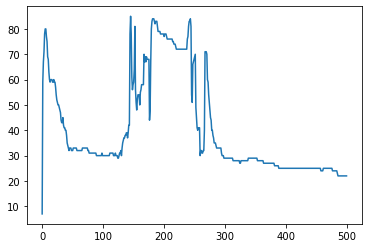

In [169]:
plt.plot(acc*100)

### Problem12:

In [176]:
lamb_maxindex=np.where(acc==np.amax(acc))
print(lamb_max)

(array([145], dtype=int64),)


     0.04    0.061    0.088    0.122    0.165     0.22     0.29    0.379     0.49     0.61
    0.054    0.079     0.11    0.149    0.179    0.236    0.348    0.488    0.632    0.787
    0.077    0.108    0.149      0.2    0.236    0.146    0.412    0.606    0.816    1.019
    0.072    0.101    0.174    0.265    0.348    0.414    0.562    0.792    1.052    1.315
    0.096    0.034    0.211    0.349    0.489    0.608    0.792    1.053    1.352    1.695
    0.167    0.195    0.303    0.464    0.635    0.819    1.054    1.353    1.733    2.182
    0.257    0.327    0.461    0.634     0.82    1.054    1.353    1.734     2.22    2.807
    0.337    0.442     0.58    0.791    1.053    1.353    1.734     2.22    2.839    3.608
    0.265    0.319    0.407    0.971    1.324    1.733     2.22    2.839    3.629    4.635
    0.208    0.222    0.124    1.197    1.666    2.182    2.807    3.608    4.635    4.702


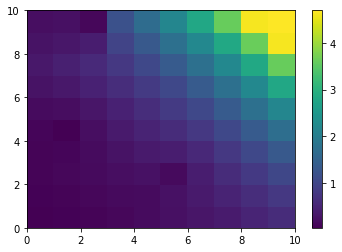

In [172]:
#original
opt = opt_val(w, matrix, states, gamma, nr)
r_opt = np.round(opt, decimals =3)
print('\n'.join([''.join(['{:9}'.format(item) for item in row]) 
      for row in r_opt]))
plt.pcolor(r_opt, vmin=np.min(r_opt), vmax=np.max(r_opt))
plt.colorbar()

    4.809    5.022    5.287    5.499    5.306    5.408    5.675    5.927    6.451    5.925
    4.422    4.936    5.482    6.206    5.652     5.24      5.7    6.445    6.578    6.473
     4.76     5.42    6.219     6.77     6.26    5.649    5.718    6.548    6.594    6.692
    5.256    5.859    6.768    6.875    7.218     6.33    6.113    6.565     6.88    7.043
    4.947    5.717    6.822    7.245    7.483    7.243    7.001    7.176    7.327     7.46
    5.446    5.677    6.409     7.47    7.657    7.941    8.114    8.282    7.858    7.948
    6.205    6.403    6.638    7.607    7.945     8.16    8.336    8.523    8.669    8.464
    6.424    6.403     6.44    6.902    7.644    7.963    8.522    8.686    8.888    9.099
    6.206    6.395    6.359    6.371    6.891    7.497    8.065    8.869    9.109    9.698
    5.524     5.61    5.412    5.648    6.416    7.234     8.04    8.725    9.679    9.725


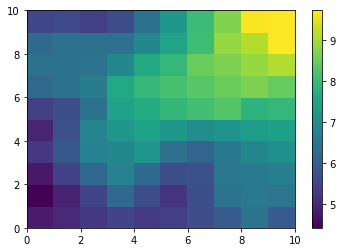

In [179]:
lamb_max=0.01*145;
# form c
c = np.concatenate((np.ones((100,)), -lamb_max*np.ones((100,)), np.zeros((100,))))
# solve
#ct=np.transpose(c)
res = linprog(c,A_ub=D,b_ub=b, A_eq=None, b_eq=None, bounds=None)
opt_x=np.array(res['x'])
R=np.reshape(opt_x[200:], (10,10)).T
#extracted
opt_extracted = opt_val(w, R, states, gamma, nr)
r_opt_extracted = np.round(opt_extracted, decimals =3)
print('\n'.join([''.join(['{:9}'.format(item) for item in row]) 
      for row in r_opt_extracted]))
plt.pcolor(r_opt_extracted, vmin=np.min(r_opt_extracted), vmax=np.max(r_opt_extracted))
plt.colorbar()

### Problem 14:

In [181]:
print('\n'.join([''.join(['{:9}'.format(item) for item in row]) 
      for row in r_opt_extracted]))

    4.809    5.022    5.287    5.499    5.306    5.408    5.675    5.927    6.451    5.925
    4.422    4.936    5.482    6.206    5.652     5.24      5.7    6.445    6.578    6.473
     4.76     5.42    6.219     6.77     6.26    5.649    5.718    6.548    6.594    6.692
    5.256    5.859    6.768    6.875    7.218     6.33    6.113    6.565     6.88    7.043
    4.947    5.717    6.822    7.245    7.483    7.243    7.001    7.176    7.327     7.46
    5.446    5.677    6.409     7.47    7.657    7.941    8.114    8.282    7.858    7.948
    6.205    6.403    6.638    7.607    7.945     8.16    8.336    8.523    8.669    8.464
    6.424    6.403     6.44    6.902    7.644    7.963    8.522    8.686    8.888    9.099
    6.206    6.395    6.359    6.371    6.891    7.497    8.065    8.869    9.109    9.698
    5.524     5.61    5.412    5.648    6.416    7.234     8.04    8.725    9.679    9.725


### Problem 16:

In [182]:
lamb_max=0.01*145;
# form c
c = np.concatenate((np.ones((100,)), -lamb_max*np.ones((100,)), np.zeros((100,))))
# solve
#ct=np.transpose(c)
res = linprog(c,A_ub=D,b_ub=b, A_eq=None, b_eq=None, bounds=None)
opt_x=np.array(res['x'])
R=np.reshape(opt_x[200:], (10,10)).T
ns4, nd4= value_iteration_arrow(nnw, R, nstates4, gamma, nr)
print(nd4)

[['→' '→' '→' '↓' '←' '→' '→' '→' '↓' '↓']
 ['→' '→' '→' '↓' '↓' '↑' '→' '→' '↓' '←']
 ['→' '→' '→' '↓' '↓' '←' '→' '→' '↓' '↓']
 ['→' '→' '→' '↓' '↓' '↓' '↓' '→' '↓' '↓']
 ['→' '→' '→' '→' '↓' '←' '↓' '↓' '↓' '↓']
 ['↓' '↓' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '↓' '→' '→' '→' '→' '→' '↓' '↓' '↓']
 ['→' '→' '←' '→' '↑' '↑' '→' '→' '↓' '↓']
 ['↑' '↑' '↑' '↑' '↑' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '→' '→' '→' '→' '→' '→' '→']]


### Problem 18:

In [185]:
nstates6 = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        nstates6[i][j] += 10*j + i
gamma = 0.01
nnw = 0.1
s5, d5= value_iteration(nnw, matrix2, nstates6, gamma, nr)

D2, b2 = D_b(d5,0.8, 0.1)
lambs =np.linspace(0,5,500)
acc2=np.zeros(500)
for i, lamb in enumerate(np.linspace(0,5,500)):
    # form c
    c2 = np.concatenate((np.ones((100,)), -lamb*np.ones((100,)), np.zeros((100,))))
    # solve
    #ct=np.transpose(c)
    res2 = linprog(c2,A_ub=D2,b_ub=b2, A_eq=None, b_eq=None, bounds=None)
    opt_x2=np.array(res2['x'])
    R2=np.reshape(opt_x2[200:], (10,10)).T
    s7, d7= value_iteration_arrow(nnw, R2, nstates6, gamma, nr)
    accuracy2=np.sum(d7==direction2)/100
    acc2[i]=accuracy2


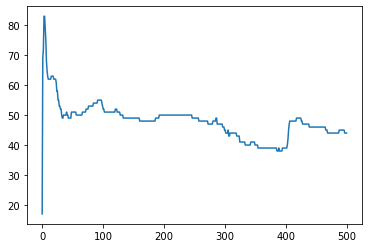

In [186]:
plt.plot(acc2*100)

### Problem 19:

In [195]:
lamb_maxindex2=np.where(acc2==np.amax(acc2))
print(lamb_maxindex2)

(array([3, 4], dtype=int64),)


### Problem 20:

    0.648    0.794    0.825    0.536    -2.37   -4.234   -1.921    1.131    1.594    2.038
     0.83    1.021    1.066   -1.868   -6.738   -8.674    -6.37   -1.295    1.928     2.61
    1.064    1.317     1.45   -1.624   -6.742  -13.911   -9.649   -5.511   -0.131    3.359
     1.36    1.693    1.948   -1.232   -6.323   -7.978   -7.937   -9.424   -1.914    4.391
    1.737    2.172     2.59   -0.726   -5.831   -3.254    -3.23   -7.419    1.719    9.163
    2.214    2.781    3.417   -0.028   -5.099   -0.549   -0.477   -2.968    6.587   15.357
    2.819    3.557    4.482    3.028    2.484    2.884   -0.455   -4.895   12.692     23.3
    3.587    4.543    5.796    7.292    6.722    7.245    0.941    12.37   21.163   33.486
    4.561    5.798    7.401    9.443   12.012   12.893   17.101   23.018   33.782   46.532
     5.73     7.32    9.391   12.048   15.456   19.828   25.501   36.161   46.587   47.315


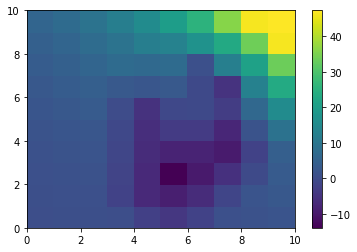

In [192]:
# orignal
opt2 = opt_val(w, matrix2, states, gamma, nr)
r_opt2 = np.round(opt, decimals =3)
print('\n'.join([''.join(['{:9}'.format(item) for item in row]) 
      for row in r_opt2]))
# genetate heat map for previous part
plt.pcolor(r_opt2, vmin=np.min(r_opt2), vmax=np.max(r_opt2))
plt.colorbar()

    0.192    0.199    0.225    0.199     0.18    0.177    0.205    0.237    0.272    0.294
    0.222     0.23    0.249    0.229    0.194    0.168    0.202    0.243    0.292    0.303
    0.247    0.255     0.27    0.252    0.209    0.191    0.216    0.249    0.301    0.304
    0.266    0.275    0.286    0.272    0.225    0.219    0.215    0.241    0.297    0.308
    0.282    0.288    0.303    0.288    0.238    0.249    0.256     0.24    0.294    0.303
    0.293    0.306    0.296    0.305    0.255    0.295    0.273    0.259    0.292      0.3
    0.307    0.312    0.325    0.305    0.296    0.312    0.298    0.275     0.29    0.297
    0.313    0.348     0.36    0.356    0.332    0.325    0.316    0.294    0.289    0.297
    0.346    0.361     0.36    0.374    0.365    0.367    0.349    0.348    0.325    0.332
    0.323    0.354    0.375    0.376     0.38     0.37    0.371    0.353    0.353    0.334


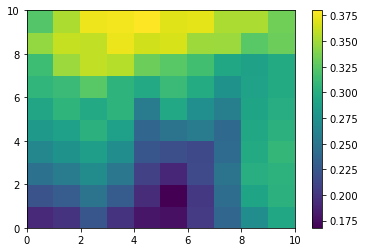

In [193]:
lamb_extracted2=0.01*3
# form c
c2 = np.concatenate((np.ones((100,)), -lamb_extracted2*np.ones((100,)), np.zeros((100,))))
# solve
#ct=np.transpose(c)
res2 = linprog(c2,A_ub=D2,b_ub=b2, A_eq=None, b_eq=None, bounds=None)
opt_x2=np.array(res2['x'])
R2=np.reshape(opt_x2[200:], (10,10)).T
# revised
opt2_extracted = opt_val(w, R2, states, gamma, nr)
r_opt2_extracted = np.round(opt2_extracted, decimals =3)
print('\n'.join([''.join(['{:9}'.format(item) for item in row]) 
      for row in r_opt2_extracted]))
# genetate heat map for previous part
plt.pcolor(r_opt2_extracted, vmin=np.min(r_opt2_extracted), vmax=np.max(r_opt2_extracted))
plt.colorbar()

### Problem 21:

In [194]:
print('\n'.join([''.join(['{:9}'.format(item) for item in row]) 
      for row in r_opt2_extracted]))

    0.192    0.199    0.225    0.199     0.18    0.177    0.205    0.237    0.272    0.294
    0.222     0.23    0.249    0.229    0.194    0.168    0.202    0.243    0.292    0.303
    0.247    0.255     0.27    0.252    0.209    0.191    0.216    0.249    0.301    0.304
    0.266    0.275    0.286    0.272    0.225    0.219    0.215    0.241    0.297    0.308
    0.282    0.288    0.303    0.288    0.238    0.249    0.256     0.24    0.294    0.303
    0.293    0.306    0.296    0.305    0.255    0.295    0.273    0.259    0.292      0.3
    0.307    0.312    0.325    0.305    0.296    0.312    0.298    0.275     0.29    0.297
    0.313    0.348     0.36    0.356    0.332    0.325    0.316    0.294    0.289    0.297
    0.346    0.361     0.36    0.374    0.365    0.367    0.349    0.348    0.325    0.332
    0.323    0.354    0.375    0.376     0.38     0.37    0.371    0.353    0.353    0.334


### Problem 23:

In [205]:
lamb_extracted2=0.01*3
# form c
c2 = np.concatenate((np.ones((100,)), -lamb_extracted2*np.ones((100,)), np.zeros((100,))))
# solve
#ct=np.transpose(c)
res2 = linprog(c2,A_ub=D2,b_ub=b2, A_eq=None, b_eq=None, bounds=None)
opt_x2=np.array(res2['x'])
R2=np.reshape(opt_x2[200:], (10,10)).T
s7, d7= value_iteration_arrow(nnw, R2, nstates6, gamma, nr)
print(d7)

[['↓' '↓' '↓' '←' '←' '→' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '→' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '→' '→' '→' '→']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '→' '→' '↑']
 ['↓' '→' '↓' '←' '←' '↓' '↓' '→' '→' '↑']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '←' '→' '↑']
 ['↓' '↓' '↓' '↓' '→' '↓' '←' '←' '→' '↑']
 ['→' '↓' '↓' '↓' '↓' '↓' '←' '↓' '↓' '↓']
 ['→' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓' '↓']
 ['→' '→' '→' '↓' '←' '←' '←' '←' '←' '→']]
